In [6]:
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16

In [1]:
!unzip /content/Data.zip

Archive:  /content/Data.zip
   creating: Data/
   creating: Data/Test/
   creating: Data/Test/bumper_dent/
  inflating: Data/Test/bumper_dent/door_dent_168.jpg  
  inflating: Data/Test/bumper_dent/door_dent_238.jpg  
  inflating: Data/Test/bumper_dent/door_dent_411.jpg  
  inflating: Data/Test/bumper_dent/door_dent_452.jpg  
  inflating: Data/Test/bumper_dent/door_dent_54.jpg  
  inflating: Data/Test/bumper_dent/got-rear-ended-right-after-i-left-the-car-lot-in-my-new-car-insurance-wants-to-repair-a-hole-in-the-bumper.jpg  
  inflating: Data/Test/bumper_dent/IMG_0328.jpg  
  inflating: Data/Test/bumper_dent/istockphoto-474419115-612x612.jpg  
  inflating: Data/Test/bumper_dent/LYnd8jo.jpg  
  inflating: Data/Test/bumper_dent/new-car-door-cost-left-quarter-bumper-damage-the-quarter-panel-was-repaired.jpg  
  inflating: Data/Test/bumper_dent/PB190061.JPG  
  inflating: Data/Test/bumper_dent/RO 4944 005.jpg  
  inflating: Data/Test/bumper_dent/RO 8169 6-1-2015 5-52-43 PM.JPG  
  inflating:

In [2]:
from keras.preprocessing.image import load_img

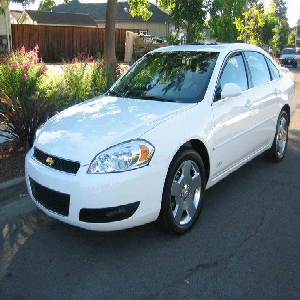

In [3]:
img = load_img("Data/Validation/No Damaged/0219.jpg",target_size=(300,300))
img

In [4]:
print(img.size)

(300, 300)


In [7]:
listdir("/content/Data")

['Train', 'Test', 'Validation']

In [8]:
i=0
for j in range(1,4):
  xi=[]
  xi.append(j)
  i=i+1

In [9]:
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [10]:
folder="/content/Data/Test"
x_test, y_test = list(), list()
for file1 in listdir(folder):
  file2=folder + "/" + file1
  for file3 in listdir(file2):
    file4=file2+"/" + file3
    image = load_img(file4,target_size=(300,300))
    image=img_to_array(image)
    x_test.append(image)
    y_test.append(file1)


In [11]:
len(x_test)

252

In [12]:
x_test[0]

array([[[199., 189., 197.],
        [199., 188., 194.],
        [199., 188., 194.],
        ...,
        [  0.,   6.,   0.],
        [ 18.,  23.,  19.],
        [ 71.,  82.,  76.]],

       [[200., 190., 198.],
        [199., 188., 194.],
        [199., 188., 194.],
        ...,
        [ 32.,  44.,  22.],
        [  5.,  13.,   2.],
        [ 25.,  36.,  32.]],

       [[201., 191., 199.],
        [200., 189., 195.],
        [199., 188., 194.],
        ...,
        [ 39.,  53.,  28.],
        [  7.,  20.,   2.],
        [ 15.,  28.,  21.]],

       ...,

       [[215., 209., 211.],
        [218., 214., 215.],
        [217., 215., 216.],
        ...,
        [225., 220., 216.],
        [222., 218., 217.],
        [221., 217., 216.]],

       [[214., 208., 210.],
        [217., 213., 214.],
        [219., 217., 218.],
        ...,
        [223., 218., 214.],
        [224., 220., 219.],
        [222., 218., 217.]],

       [[214., 208., 210.],
        [215., 211., 212.],
        [213., 2

In [13]:
len(y_test)

252

In [14]:
y_test[0]

'tail_lamp'

In [15]:
x_test=asarray(x_test)


In [16]:
x_test.shape

(252, 300, 300, 3)

In [17]:
y_test=asarray(y_test)

In [18]:
x_test.shape

(252, 300, 300, 3)

In [19]:
folder="/content/Data/Train"
x_train, y_train = list(), list()
for file1 in listdir(folder):
  file2=folder + "/" + file1
  for file3 in listdir(file2):
    file4=file2+"/" + file3
    image = load_img(file4,target_size=(300,300))
    image=img_to_array(image)
    x_train.append(image)
    y_train.append(file1)


In [20]:
x_train=asarray(x_train)
x_train.shape


(1040, 300, 300, 3)

In [21]:
y_train=asarray(y_train)
x_train.shape

(1040, 300, 300, 3)

In [22]:
folder="/content/Data/Validation"
x_val, y_val = list(), list()
for file1 in listdir(folder):
  file2=folder + "/" + file1
  for file3 in listdir(file2):
    file4=file2+"/" + file3
    image = load_img(file4,target_size=(300,300))
    image=img_to_array(image)
    x_val.append(image)
    y_val.append(file1)


In [23]:
x_val=asarray(x_val)
x_val.shape


(275, 300, 300, 3)

In [24]:
y_val=asarray(y_val)
y_val.shape


(275,)

In [25]:
from numpy import savez_compressed

In [26]:
# save arrays to one file in compressed format
savez_compressed('car_data.npz',x_train, y_train, x_test, y_test, x_val,y_val)

In [27]:
from numpy import load

In [28]:
# load the face dataset
data = load('car_data.npz')

In [29]:
x_train, y_train, x_test, y_test, x_val,y_val=data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5']

In [30]:
x_train.shape

(1040, 300, 300, 3)

In [31]:
y_train.shape

(1040,)

In [32]:
y_val.shape

(275,)

In [33]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [34]:
import numpy
numpy.unique(y_train)

array(['Damaged', 'No Damaged', 'bumper_dent', 'bumper_scratch',
       'door_dent', 'door_scratch', 'glass_shatter', 'head_lamp',
       'tail_lamp'], dtype='<U14')

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [37]:
y_train=le.fit_transform(y_train)

In [38]:
numpy.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [42]:
k=numpy.unique(y_train)

In [43]:
le.inverse_transform(k)

array(['Damaged', 'No Damaged', 'bumper_dent', 'bumper_scratch',
       'door_dent', 'door_scratch', 'glass_shatter', 'head_lamp',
       'tail_lamp'], dtype='<U14')

In [44]:
y_test=le.fit_transform(y_test)

In [45]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [46]:
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

In [47]:
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [48]:
train_norm[0].shape

(300, 300, 3)

In [49]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump

In [50]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import plot_model
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [53]:
from matplotlib import pyplot

In [56]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16

In [57]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [81]:
# define cnn model
def define_model():
# load model
  model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
# add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
  output = Dense(9, activation="softmax")(class1)
# define new model
  model = Model(inputs=model.inputs, outputs=output)
# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [82]:
k1=define_model()

In [83]:
k1.summary()

Model: "functional_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)     

In [84]:
#train_norm,test_norm,y_train,y_test

In [85]:
k1.fit(train_norm, y_train, epochs=20, batch_size=64, validation_data=(test_norm, y_test), verbose=0)

In [86]:
test_norm[0].shape

(300, 300, 3)

In [87]:
k=test_norm[0]

In [89]:
k = k.reshape((1,300, 300, 3))

In [95]:
a=2
a

2

In [97]:
_, acc =k1.evaluate(test_norm, y_test, verbose=0)

In [98]:
acc

0.6944444179534912